# Natural Language Processing: Word Embeddings

---

<div class="alert alert-success">  
    
### Learning Objectives 

* Recognize differences between bag-of-words representations and word embeddings.
* Learn how word embeddings capture the meaning of words.
* Calculate cosine similarity to capture linguistic concepts.
* Understand that word embeddings models can be biased, and develop approaches to uncover these biases.
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
1. [Understand Word Embeddings](#section1)
2. [Word Similarity](#section2)
3. [Word Analogy](#section3)
4. [Bias in Word Embeddings](#section4)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors

## Comparison with Bag-of-Words

**What exactly is the problem with the bag-of-words approach?**

Recall from last week that the bag-of-words model represents the text as numbers using **word frequency counts**. Specifically, each position in the matrix corresponds to a particular word, and the matrix specifies how many times each word occurs.

<img src='../../img/bow-illustration-2.png' alt="BoW" width="500">

The model does not take into account any relationships between the words. In other words, it has no understanding that "bank" and "money" are closely related, and neither does it understand that "cat" and "dog" are both animals. **Each word is treated independently from every other word**, leading to relatively **sparse representations** with limited ability to capture semantic similarity. This limits the model's ability to understand language.

Consider a scenario where our bag-of-words model was not trained on a particular dataset with the word "puppy" in it. If it later encounters the word "puppy," it wouldn't be able to associate "puppy" with "dog," even though the two words are very closely related.

<img src='../../img/bow-illustration-3.png' alt="BoW" width="500">

In this case, word embeddings can be a more robust alternative to the bag-of-words approach. Word embeddings try to capture the **semantic similarity** between words. If the word embedding model has learned that "puppy" and "dog" are similar, it can leverage this understanding when encountering new "puppy" contexts.

The history of language modeling is a history of turning words into numbers in increasingly clever ways.

## Training a Word Embeddings Model

The values of word embeddings are initiated randomly, but as the model is trained on data, these values eventually encode the meaning of words. 

In word embeddings, we treat semantic relations as a Machine Learning (ML) problem. Essentially, we teach a **neural network** how to predict the similarity of words by throwing in all of the words in our corpus, and training it to identify patterns and relationships between them based on their contextual usage.

This process involves looking at words that appear closely together within a sentence or document, and assume that this mean they have similar meanings. That's all! Surprisingly, this is enough to capture all kinds of semantic and syntactic features in the data.

In the famous words of linguist J.R. Firth: 
#### "You shall know a word by the company it keeps."

Word2Vec learns word embeddings based on a **context window** size. This size determines how many neighboring words the model looks at to learn the relationships between words. For example, if the context window size is 2, the model will only consider the two words before and after a target word. So, in the sentence "the dog chased the cat," when learning about "chased," the model will only take into account "the" and "dog" on the left and "the" and "cat" on the right.

In this representation, each word is represented by a **dense vector** of numbers. In simple terms: not a list with lots of 0's and some 1's, but a list full of complex numbers. 

<img src='../../img/embedding.png' alt="Word embedding example" width="400">

Note that the numbers in vectors in these kinds of models are sometimes called **weights** or **parameters**.

The learning that goes on within the neural network is about nudging these word vectors (lists) so that they get better and better at *being predicted*.

Bottom line: Word embeddings models yield vectors that are both much shorter, and much more information-rich than Bag of Words models.

## What is Word2Vec?

Word2Vec is a technique for generating word embeddings and was introduced by a team at Google led by [Tomas Mikolov](https://en.wikipedia.org/wiki/Tomas_Mikolov). The basic idea of Word2Vec is that words that occur in similar contexts tend to have similar meanings. Word2Vec leverages this idea by learning word representations based on the contexts in which they appear.

<img src='../../img/target_word.png' alt="Target word" width="500">

Word2Vec trains a **neural network** to perform one of two tasks: either predicting a word given its context (this approach is called **CBOW**, which stands for Continuous Bag of Words), or predicting the context given a target word (this approach is called **Skip-gram**). We don't need to get into the detail of how the neural network works, but the idea is that the network will learn to encode each word as a vector of numbers (a word embedding) such that words that appear in similar contexts will have similar vectors.

<img src='../../img/word2vec-model.png' alt="word2vec" width="550">

The training aims to create word embeddings that capture semantic and syntactic relationships between words. For example, after training, the vectors for "king" and "queen" should be similar because they often appear in similar contexts (they're both royalty, both appear in similar types of sentences, etc.).

While this is a pretty outdated approach to creating embeddings, it represents a major breakthrough in how we approach representing language for computers.

## Using Word Embeddings with Gensim

The weights for the word embedding models hosted in `gensim` can be retrieved in two ways. We can download them using the `gensim.downloader` API. Alternatively, these models can be downloaded to your local machine ahead of time, and then we use `KeyedVectors` to load them in. 

In [ ]:
# Get word embedding model weights
gensim_models = list(api.info()['models'].keys())

for model in gensim_models:
    print(model)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


These options are named following the **model-corpora-dimension** fashion. The one called `word2vec-google-news-300` is what we are looking for! These are the vectors of the original `word2vec` model that was trained on Google News; the dimension of the embeddings is 300. 

We can retrieve the weights in two ways:
- Download them via `api.load()`
- Download them as a zip file and then load it in with `KeyedVectors.load()` (about 1.5GB).

The pretrained word2vec weights are archived by Google. You can download them via [this Google Drive link](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g). 

In [6]:
# Run the following line if your local machine has plenty of memory
wv = api.load("word2vec-google-news-300")

If `api.load()` is not working for you, you can place the downloaded weights in the `data` folder, the following file path should work.

In [14]:
# Alternatively, download the weights to your machine and load them in 
# wv = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

Accessing the actual word vectors can be done by treating the word vector model as a dictionary. 

For example, let's take a look at the word vector for "banana."

In [15]:
wv['queen']

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11

Let's inspect the shape of the "banana" vector. 

In [16]:
wv['queen'].size

300

As promised, it is an 1-D array that holds 300 values. 

These values appear to be random floats and don't really make sense to us at the moment, but they are numerical representations on which we can perform computations. 

Let's take a look at a few examples!

## Visualizing Word Embeddings
 
The useful thing about these embeddings is that words (or really, tokens) with similar vectors have similar meanings. In fact, particular "directions" in the embedding space turn out to be associated with particular types of meaning. For instance, word embedding directions capture things like tenses, gender, or country-capital relations.

<img src='../../img/vector.png' alt="word embeddings vectors" width="600">

You may be asking: how are we visualizing this? After all, when we work with word embeddings, we are dealing with high-dimension space (in the code example above: 10 dimensions). This is impossible to visualize!

However, we can reduce these dimensions using algorithms such as Principle Comonent Analysis (PCA).

Using PCA, we will reduce the dimensionality of our 10-dimensional words to 2 dimensions, allowing us to visualize them in a 2-dimensional graph.

In [12]:
words = ["king","queen","man","woman","paris","france","rome","italy","dog","cat"]
X = wv[words]
# then run the same PCA + plot code

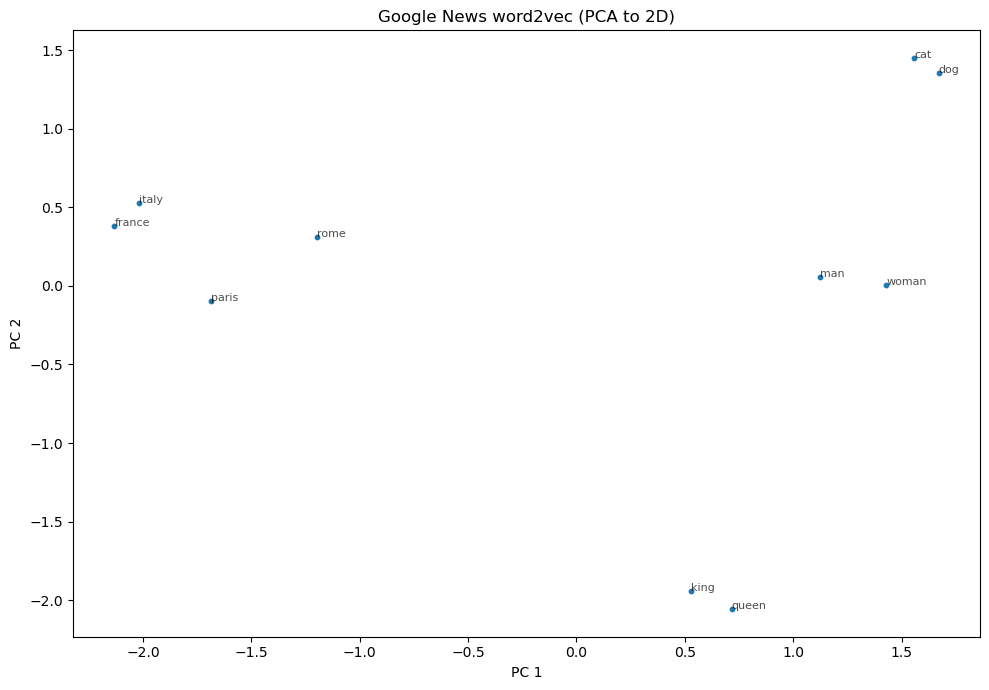

In [13]:
# reduce to 2D with PCA
pca = PCA(n_components=2, random_state=0)
coords = pca.fit_transform(X)

# plot
plt.figure(figsize=(10, 7))
plt.scatter(coords[:, 0], coords[:, 1], s=10)

# label (optional; can get messy if too many)
for i, w in enumerate(words):
    plt.annotate(w, (coords[i, 0], coords[i, 1]), fontsize=8, alpha=0.7)

plt.title("Google News word2vec (PCA to 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.tight_layout()
plt.show()

## Calculating With Embeddings

The fact that similar words are captured by similar vectors also means we can do interesting calculations with them. Here's a famous example:

`V(King) - V(man) + V(Woman) ~ V(Queen)`

Subtracting the embedding vector of the word "man" from the word "king", while adding the embedding vector of the word "woman", results in a vector that approximates the vector for the word "queen".

<img src='../../img/word-alg.png' alt="word algebra example" width="400">

In [ ]:
# classic analogy: king - man + woman ≈ ?
wv.most_similar(positive=["king", "woman"], negative=["man"], topn=10)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

Without getting too deep into the math behind this, one helpful intuition is that the **dot product** of two vectors can be thought of as a measure of how well they align. 

Geometrically, the dot product is positive when vectors point in similar diections, and negative if they don't.

We can make use of this intuition to find out if an embedding model captures particular semantic dimensions. As you can see, carrying out these operations can be done with the `most_similar` function. 

<a id='section2'></a>

# Word Similarity

A
 question we can ask is: what words are similar to "bank"? In vector space, we expect similar words to have vectors that are close to each other.

There are many metrics for measuring vector similarity; one of the most widely used is [**cosine similarity**](https://en.wikipedia.org/wiki/Cosine_similarity). Orthogonal vectors have a cosine similarity of 0, and parallel vectors have a cosine similarity of 1.

`gensim` provides a function called `most_similar` that lets us find the words most similar to a queried word. The output is a tuple containing candidate words and their cosine similarities to the queried word.

Let's give it a shot!

In [ ]:
wv.most_similar(['bank'])

[('banks', 0.7440759539604187),
 ('banking', 0.6901614665985107),
 ('Bank', 0.6698698401451111),
 ('lender', 0.634228527545929),
 ('banker', 0.6092953681945801),
 ('depositors', 0.6031531691551208),
 ('mortgage_lender', 0.5797975659370422),
 ('depositor', 0.5716428160667419),
 ('BofA', 0.5714625120162964),
 ('Citibank', 0.5589520931243896)]

It looks like words that are most similar to "bank" are other financial terms! 

Recall that `word2vec` is trained to capture a word's meaning based on contextual information. These words are considered similar to "bank" because they appear in similar contexts. 

In addition to querying for the most similar words, we can also ask the model to return the cosine similarity between two words by calling the function `similarity`.

Let's go ahead and check out the similarities between the following four pairs of words. In each pair, we have "river" and "bank," but the form of "bank" varies. Let's see if word forms make a difference!

In [ ]:
# bank with capitalized B
wv.similarity('river', 'Bank')

0.07048161

In [ ]:
# the present participle
wv.similarity('river', 'banking')

0.10886547

In [ ]:
# the word stem
wv.similarity('river', 'bank')

0.21523127

In [ ]:
# the plural form
wv.similarity('river', 'banks')

0.21918102

🔔 **Question**: Why do "banks" and "river" have a higher similarity score than other pairs?

## 🥊 Challenge 1: Calculating Similarity

Now it's your turn! In the following cell, we have prepared a list of coffee-noun pairs, i.e., the word "coffee" is paired with the name of a specific coffee drink. Let's find out which coffee drink is considered most similar to "coffee" and which one is not. 

Complete the for loop (two cells below) to calculate the cosine similarity between each pair of words by using the `similarity` function. 

In [ ]:
coffee_nouns = [
    ('coffee', 'espresso'),
    ('coffee', 'cappuccino'),
    ('coffee', 'latte'),
    ('coffee', 'americano'),
    ('coffee', 'irish'),
]

In [ ]:
for w1, w2 in coffee_nouns:
    similarity = # YOUR CODE HERE
    print(f"{w1}, {w2}, {similarity}")

Next, let's focus on verbs commonly associated with coffee-making. Take a look at the use case for the [`doesnt_match`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.doesnt_match.html) function and then use it to identify the verb that does not seem to belong.

Feel free to add more verbs to the list!

In [ ]:
coffee_verbs = ['brew', 'drip', 'pour', 'make', 'grind', 'roast']

In [ ]:
verb_doesnt_match = # YOUR CODE HERE
verb_doesnt_match

🔔 **Question**: What have you found? Share your answers in the chat! 

We can do a lot more with this "word algebra". For instance, let's calculate the difference between the vectors for the words "cats" and "cat" (by subtracting one from the other). The intuition is we should get a vector that approximates the semantic dimension of **plurality**. We can then compare this vector to other words in singular or plural to check whether this intuition holds.

In [ ]:
import gensim.downloader as api
from scipy.spatial.distance import cosine

# Calculate the "plurality" vector - like asking "what differentiates "cats" from "cat"?
plurality_vector = model['cats'] - model['cat']

# Now, let's define some example singular and plural nouns for comparison
singular_nouns = ['dog', 'house', 'car']
plural_nouns = ['dogs', 'houses', 'cars']

# Function to compute the cosine similarity (as dot product)
# Note: Word2Vec embeddings are usually normalized, so dot product gives cosine similarity
def compare_similarity(reference_vector, comparison_words):
    similarities = {}
    for word in comparison_words:
        # Compute cosine similarity
        similarity = 1 - cosine(reference_vector, model[word])
        similarities[word] = similarity
    return similarities

# Compare the "plurality" vector against singular and plural nouns
singular_similarities = compare_similarity(plurality_vector, singular_nouns)
plural_similarities = compare_similarity(plurality_vector, plural_nouns)

Let's visualize:

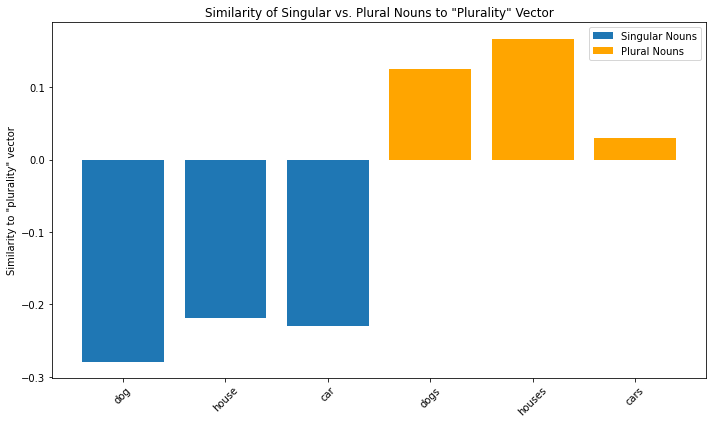

In [ ]:
import matplotlib.pyplot as plt

# Data preparation for plotting
labels = list(singular_similarities.keys()) + list(plural_similarities.keys())
singular_scores = list(singular_similarities.values())
plural_scores = list(plural_similarities.values())

# Indices for singular and plural nouns on the x-axis
x_singular = range(len(singular_similarities))
x_plural = range(len(singular_similarities), len(singular_similarities) + len(plural_similarities))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_singular, singular_scores, label='Singular Nouns')
plt.bar(x_plural, plural_scores, label='Plural Nouns', color='orange')

# Adding labels and title
plt.xticks(range(len(labels)), labels, rotation=45)
plt.ylabel('Similarity to "plurality" vector')
plt.title('Similarity of Singular vs. Plural Nouns to "Plurality" Vector')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Looks like the plural words do align more with the direction of our "plurality" vector!

🔔 **Question:** Can you think of another certain dimension of meaning that might be encoded across the vector space of the embeddings?

## 🥊 Challenge 2: Woman is to Homemaker?

[Bolukbasi et al. (2016)](https://arxiv.org/abs/1607.06520) is a thought-provoking investigation of gender bias in word embeddings, and they primarily focus on word analogies, especially those that reveal gender stereotyping. Let run a couple examples discussed in the paper, using the `most_similiar` function we've just learned. 

The following cell contains a few examples we can pass to the `positive` and `negative` arguments. For example, we want the output to be similar to "woman" and "chairman" but dissimilar to "man." We'll print the top result by indexing the 0th item. 

Let's complete the following for loop.

In [ ]:
positive_pair = [['woman', 'chairman'],
                 ['woman', 'doctor'], 
                 ['woman', 'computer_programmer']]
negative_word = 'man'

In [ ]:
for example in positive_pair:
    result = # YOUR CODE HERE
    print(f"man is to {example[1]} as woman to {result[0][0]}")

🔔 **Question**: What do you find most surprising or unsurprising about these results?

## Another Model: GloVe

Let's now download a word embeddings model called [GloVe](https://nlp.stanford.edu/projects/glove/) (2014) which was **pre-trained** based on 2 billion tweets. This model has a vocabulary of 1.2 million words (instead of the 12 words we trained our little model on above), so we can expect the word embeddings to have captured a lot of semantic and syntactic information.

Let's use PCA to visualize the vectors for some words of our choice that we assume might be related, like "king", "queen", "man", and "woman".

💡 **Tip**: Feel free to play around with the words in `words` to see where they end up in the visualization!

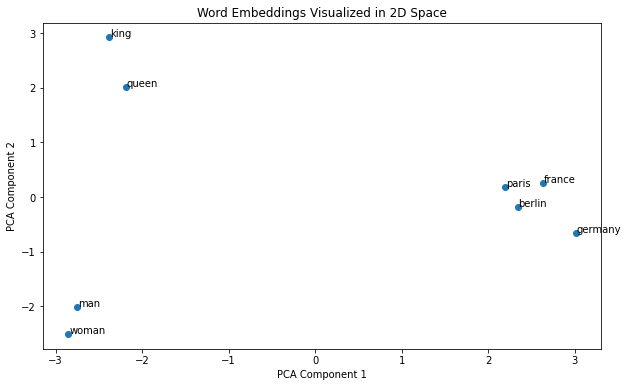

In [ ]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Download a word embedding model
model = api.load("glove-wiki-gigaword-50")

# Select words you're interested in
words = ["king", "queen", "man", "woman", "paris", "berlin", "france", "germany"]

# Get corresponding vectors
word_vectors = [model[word] for word in words]

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Create a scatter plot of the projection
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0]+0.01, result[i, 1]+0.01))

plt.title('Word Embeddings Visualized in 2D Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


<a id='section4'></a>

# Bias in Word Embeddings

### `GloVe` 

Any forms of stereotyping is disturbing. Now that we've known gender bias is indeed present in the pretrained embeddings, let's take a more in-depth look at it.

We will switch gears to a smaller word embedding model—pretrained `GloVe`. Let's load it with the `api.load()` function. 

The `GloVe` mode is trained from Wikipedia and Gigaword (news data). Check out the [documentation](https://nlp.stanford.edu/projects/glove/) for more detailed model descriptions.

In [21]:
glove = api.load('glove-wiki-gigaword-50')

Let's double check the dimension of the vector, using the "banana" example again. 

In [21]:
glove['banana'].size

50

### Semantic Axis

To investigate gender bias in word embeddings, we first need a vector that captures the concept of gender. The idea is to construct **a semantic axis** for this concept. 

The rationale for using a semantic axis is that a concept is often complex and cannot be sufficiently denoted by a single word. It is also fluid, meaning that its meaning is not definite but can span form one end of an axis to the other. Once we have the vector representation of a concept, we can project a list of terms onto that axis to see if a term is more aligned towards one end or the other. 

We follow [An et al. 2018](https://aclanthology.org/P18-1228/) to construct a semantic axis. In preparation, we first need to come up with two sets of pole words that have opposite meanings.

- $\mathbf{W}_{\text{plus}} = \{w_{1}^{+}, w_{2}^{+}, w_{3}^{+}, ..., w_{i}^{+}\}$

- $\mathbf{W}_{\text{minus}} = \{w_{1}^{-}, w_{2}^{-}, w_{3}^{-}, ..., w_{j}^{-}\}$

We then take the mean of each vector set to represent the core meaning of that set. 

- $\mathbf{V}_{\text{plus}} = \frac{1}{i}\sum_{1}^{i}w_{i}^{+}$

- $\mathbf{V}_{\text{minus}} = \frac{1}{j}\sum_{1}^{j}w_{j}^{-}$

Next, we take the difference between the two means to represent the semantic axis of the intended concept. 

- $\mathbf{V}_{\text{axis}} = \mathbf{V}_{\text{plus}} - \mathbf{V}_{\text{minus}}$

Projecting a specific term to the semantic axis is, as we've learned above, operationalized as taking the cosine similarity between the word's vector and the semantic axis vector. A positive value would indicate that the term is closer to the $\mathbf{V}_{\text{plus}}$ end. A negative value means proximity to the $\mathbf{V}_{\text{minus}}$ end. 

- $score(w) = cos(v_{w},  \mathbf{V}_{\text{axis}})$

With this tool, we can go ahead and construct a vector for the concept "gender"; however, this method is still limited, as gender identity in the real world cannot just be reduced to two polarities. As we proceed, we will discover how much stereotypying is encoded in gender terms.

## 🥊 Challenge 3: Construct a Semantic Axis

The following cell defines a set of "female" terms and a set of "male" terms; these example words are from [Bolukbasi et al., 2016](https://arxiv.org/abs/1607.06520). 

To complete the function `get_semaxis`, you will need to:

- Get the word embeddings for terms in each list and save the embeddings to the corresponding lists `v_plus` and `v_minus`. You can use the `model` argument as a dictionary to retrieve word embeddings. 
- Calculate the mean embedding for each list and save the means to the corresponding variables `v_plus_mean` and `v_minus _mean`.
- Get the difference between the two means and return the difference vector (i.e., the vector for the semantic axis) 

We have provided some starter code for you (two cells below). If everything runs correctly, the embedding size of the semantic axis should be the same as the size of the input vector. 

In [22]:
# Define two sets of pole words (examples from Bolukbasi et al., 2016)
female = ['she', 'woman', 'female', 'daughter', 'mother', 'girl']
male = ['he', 'man', 'male', 'son', 'father', 'boy']

In [ ]:
def get_semaxis(list1, list2, model, embedding_size):
    '''Calculate the embedding of a semantic axis given two lists of pole words.'''

    # Step 1: Get the embeddings for terms in each list
    # v_plus = ...
    # v_minus = ...

    # Step 2: Calculate the mean embedding for each list
    # v_plus_mean = ...
    # v_minus_mean = ...

    # Step 3: Get the difference between two means
    # sem_axis = ...

    # Sanity check
    assert sem_axis.size == embedding_size
    
    return sem_axis

In [24]:
# Plug in the gender lists to calculate the semantic axis for gender
gender_axis = get_semaxis(list1=female, 
                          list2=male, 
                          model=glove, 
                          embedding_size=50)
gender_axis

array([ 0.08418201,  0.30625182, -0.23662159,  0.02026337, -0.00296998,
        0.6195349 ,  0.01208681,  0.06963003,  0.49099812, -0.20878893,
        0.00934163, -0.44707334,  0.48806185,  0.19471335,  0.20141667,
        0.0832995 , -0.4245833 , -0.08612835,  0.47612852, -0.05129966,
        0.31475997,  0.49075842,  0.12465019,  0.26685053,  0.29776838,
        0.14211655, -0.09953564,  0.2320785 , -0.01026282, -0.30585438,
       -0.1335001 ,  0.21605133,  0.10961549, -0.03373036, -0.13584831,
       -0.12131716, -0.14671612, -0.04348468,  0.06151834, -0.3654362 ,
       -0.06193466, -0.17093089,  0.5058871 , -0.44872418,  0.05962732,
       -0.18274659,  0.24432765, -0.3396697 ,  0.00442566,  0.10554916],
      dtype=float32)

The vector for "gender" has now been created. The next step is to project a list of terms onto the gender axis. We can continue with the occupation terms we've tested previously in Challenge 2. 

In [25]:
# Define a list of occupations terms; examples are taken from Bolukbaski et al.
occupations = ['engineer',
               'nurse',
               'designer',
               'receptionist',
               'banker',
               'librarian',
               'architect',
               'hairdresser',
               'philosopher']

Before calculating the cosine similarity, let's first rate the following occupation terms using your intuition. Ratings should be between $[-1, 1]$. A negative value means the term is closer to the male end; a positive value means it is closer to the female end.

In [ ]:
# Uncomment to rate the following occupation terms
# occ_rating = {'engineer': ...,
#               'nurse': ...,
#               'designer': ...,
#               'receptionist': ...,
#               'banker': ...,
#               'librarian': ...,
#               'architect': ...,
#               'hairdresser': ...,
#               'philosopher': ...
#              }

In [26]:
# Calculate cosine similarity between a given word and the axis
def get_projection(word, model, axis):
    '''Get the projection of a word onto a semantic axis'''
    
    word_norm = model[word] / np.linalg.norm(model[word])
    axis_norm = axis / np.linalg.norm(axis)
    projection = np.dot(word_norm, axis_norm) 
    
    return projection

In [27]:
occ_projections = {word: get_projection(word, glove, gender_axis) for word in occupations}
occ_projections 

{'engineer': -0.17089118,
 'nurse': 0.3756587,
 'designer': 0.116768315,
 'receptionist': 0.34369344,
 'banker': -0.12623654,
 'librarian': 0.13333757,
 'architect': -0.27095127,
 'hairdresser': 0.2927159,
 'philosopher': -0.21503611}

## Visualize the Projection

Now that we have calculated the projection of each occupation term onto the gender axis, let's plot these values to gain a more straightforward understanding of how much gender stereotyping is hidden in these terms.

We will use a bar plot to visualize the results, using a gradient color palette. The bar's color approximates the proximity of a term to an end.

In [28]:
from matplotlib.colors import Normalize

def plot_semantic_axis(projections, title, xlab):
    '''Return a horizontal bar plot of the projections.'''

    # Sort the projections in descending order
    projection_sorted = sorted(projections.items(), key=lambda term: term[1], reverse=True)

    # Extract the terms
    terms = [term_value[0] for term_value in projection_sorted]

    # Extract corresponding values of projections
    values = [term_value[1] for term_value in projection_sorted]

    # Take the absolute values for gradient color fill
    values_abs = np.abs(values)
    norm = Normalize(vmin=min(values_abs), vmax=max(values_abs))
    cmap = plt.get_cmap("YlOrBr")  
    colors = [cmap(norm(value)) for value in values_abs]

    plt.figure(figsize=(8, 6))  
    plt.barh(terms, values, color=colors)
    plt.grid(axis="x", linestyle=":", alpha=0.5)
    plt.xlim(-np.max(values_abs+0.05), np.max(values_abs+0.05))
    plt.xlabel(xlab)
    plt.title(title)
    plt.show();

We will visualize the projections first, but feel free to use the above function to visualize your own ratings. 

🔔 **Question**: Do you find the results surprising or expected? Let's pause for a minute to discuss why steorotyping exists in word embeddings.

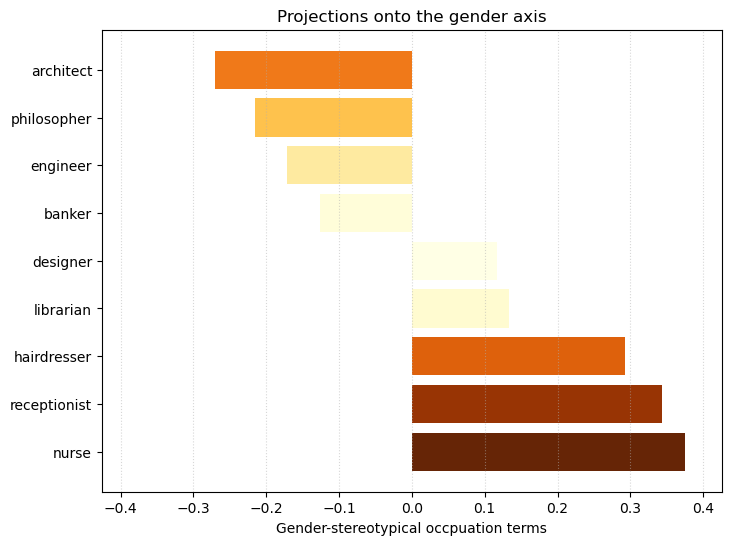

In [29]:
title1 = 'Projections onto the gender axis'
xlab = 'Gender-stereotypical occpuation terms'
plot_semantic_axis(occ_projections, title1, xlab)

In [ ]:
# Uncomment if you have specified self-rated occupation terms

# title2 = 'Self-rated projections onto the gender axis'
# plot_semantic_axis(occ_rating, title2, xlab)

## 🎬 Demo: Projections onto Two Axes

We can also project terms onto **two axes** and plot the results on **a scatter plot**, where the coordinates correspond to projections onto the two axes.

Social class is another dimension commonly investigated in the literature. In this demo, we'll create a semantic axis for affluence, one dimension of social class, using two sets of pole words representing two ends of the concept, as described in [Kozlowski et al. 2019](https://journals.sagepub.com/doi/full/10.1177/0003122419877135).

In the first example, we'll project a list of **sports terms** onto both the gender and affluence axes. We'll visualize the results on a scatter plot, with the x-axis representing gender and the y-axis representing affluence. The coordinates of each term on this plot correspond to its projections onto these axes.

Next, we'll repeat the process to visualize occupation terms to obtain a concrete idea of how much each term is biased towards either end of these two dimensions.

Let's dive in!

In [ ]:
# Define two sets of pole words for affluence; examples taken from Kozlowski et. al
poor = ['poor', 'poorer', 'poorest', 'poverty', 'inexpensive', 'impoverished', 'cheap']
rich = ['rich', 'richer', 'richest', 'affluence', 'expensive', 'wealthy', 'luxury']

affluence_axis = get_semaxis(list1=poor, 
                             list2=rich, 
                             model=glove,
                             embedding_size=50)

We will project sports terms onto the social class axis to see if some sports are more associated with the "high" society and others "low" soceity. 

In [32]:
# Define a list of sports terms; examples taken from Kozlowski et. al, 2019
sports = ['camping', 
          'boxing', 
          'bowling', 
          'baseball', 
          'soccer', 
          'tennis', 
          'golf', 
          'basketball', 
          'skiing', 
          'sailing', 
          'volleyball']

Next, let's use the `get_projection` function to calculate the cosine similarity between each sport term and each semantic axis. 

In [33]:
proj_spt_affluence = {word: get_projection(word, glove, affluence_axis) for word in sports}
proj_spt_gender = {word: get_projection(word, glove, gender_axis) for word in sports}

Finally, let's visualize the results using a scatter plot.

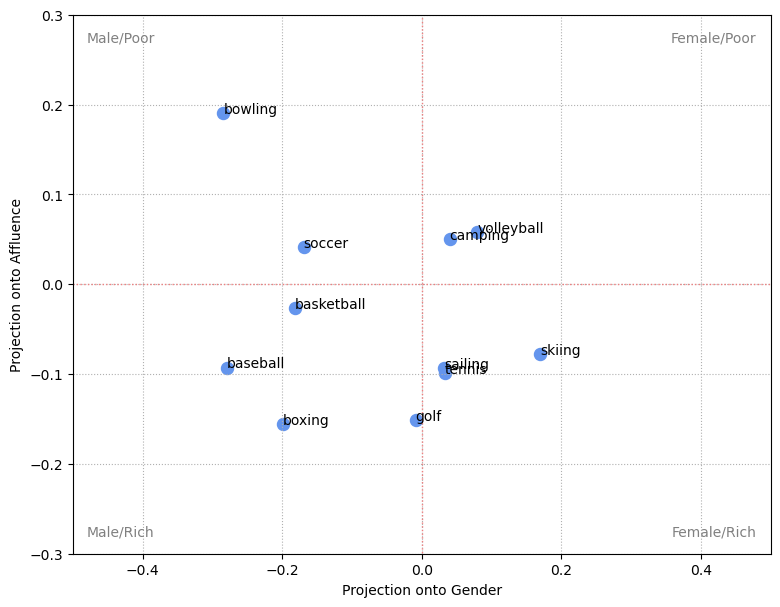

In [34]:
plt.figure(figsize=(9, 7))

# Use scatter plot to visualize the results
plt.scatter(list(proj_spt_gender.values()), 
            list(proj_spt_affluence.values()), 
            color='cornflowerblue',
            s=75)

# Add text label to each dot
for term in sports:
    plt.annotate(term, 
                (proj_spt_gender[term], proj_spt_affluence[term]), 
                 fontsize=10)

# Add more annotations to four corners of the plot
plt.annotate('Male/Rich', (-0.48, -0.28), color='gray', horizontalalignment='left')
plt.annotate('Female/Rich', (0.48, -0.28), color='gray', horizontalalignment='right')
plt.annotate('Male/Poor', (-0.48, 0.27), color='gray', horizontalalignment='left')
plt.annotate('Female/Poor', (0.48, 0.27), color='gray', horizontalalignment='right')

# Add reference lines to each semantic axis
plt.hlines(xmin=-1, xmax=1, y=0, color='lightcoral', linewidth=1, linestyle=':')
plt.vlines(ymin=-1, ymax=1, x=0, color='lightcoral', linewidth=1, linestyle=':')

# Other parameter settings
plt.xlim(-0.5, 0.5)
plt.ylim(-0.3, 0.3)
plt.grid(True, linestyle=':')
plt.xlabel('Projection onto Gender')
plt.ylabel('Projection onto Affluence')
plt.show();

🔔 **Question**: Let's take a minute to unpack the plot and discuss the following questions:
- Which sport term appears most biased towards the male end, and which towards the female end?
- Which sport appears to be gender-neutral?
- Which sport term appears most biased towards the affluent end, and which one towards the other end?
- Which sport seems neutral with respect to affluence?

We have analyzed the gender bias in the occupation terms. To probe them further, let's take their projections onto the affluence axis into account.

In [ ]:
proj_occ_gender = {word: get_projection(word, glove, gender_axis) for word in occupations}
proj_occ_affluence = {word: get_projection(word, glove, affluence_axis) for word in occupations}

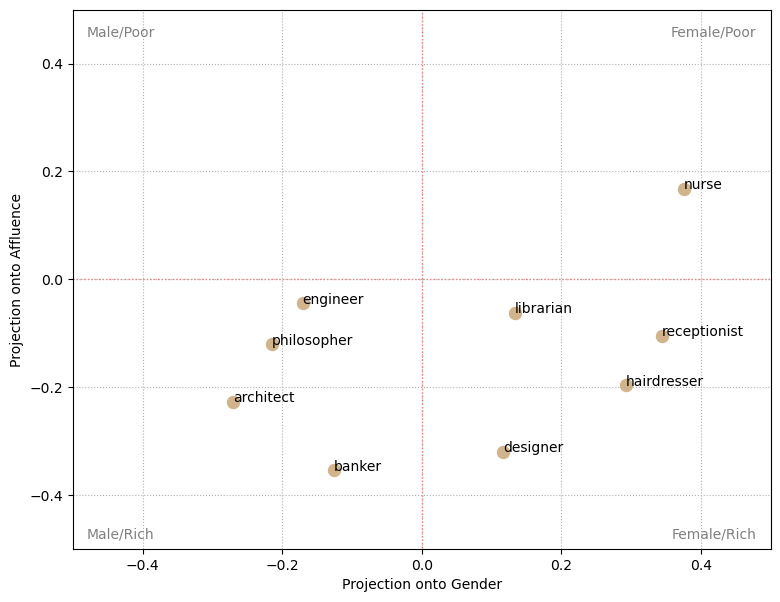

In [37]:
plt.figure(figsize=(9, 7))

# Use scatter plot to visualize the results
plt.scatter(list(proj_occ_gender.values()), 
            list(proj_occ_affluence.values()), 
            color='tan', 
            s=75)

# Add text label to each dot
for term in occupations:
    plt.annotate(term, 
                (proj_occ_gender[term], proj_occ_affluence[term]), 
                fontsize=10)

# Add more annotations to four corners of the plot
plt.annotate('Male/Rich', (-0.48, -0.48), color='gray', horizontalalignment='left')
plt.annotate('Female/Rich', (0.48, -0.48), color='gray', horizontalalignment='right')
plt.annotate('Male/Poor', (-0.48, 0.45), color='gray', horizontalalignment='left')
plt.annotate('Female/Poor', (0.48, 0.45), color='gray', horizontalalignment='right')

# Add reference lines to each semantic axis
plt.hlines(xmin=-1, xmax=1, y=0, color='lightcoral', linewidth=1, linestyle=':')
plt.vlines(ymin=-1, ymax=1, x=0, color='lightcoral', linewidth=1, linestyle=':')

# Other parameter settings
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid(True, linestyle=':')
plt.xlabel('Projection onto Gender')
plt.ylabel('Projection onto Affluence')
plt.show();

🔔 **Question**: The affluence axis provides a new perspective. Again, let's pause and discuss the following questions.

- Which occupation term immediately caught your eye, and why? 
- Which occuptation appears most biased towards the affluent end , and which one towards the other end?
- Which occputation seems neutral with respect to affluence?

We will wrap up this workshop with these two plots, and hopefully, they will leave you with some food for thought to further explore word embeddings. Constructing a semantic axis for a cultural dimension, such as gender or affluence, is widely researched. With this tool in hand, we can investigate concepts beyond culture. It could be a useful method for capturing the abstract meanings of various notions, such as an axis of coldness, an axis of kindness, and so on. 

Topics introduced in this workshop benefit greatly from research advances in the field of NLP. Check out the reference section if you would like to take a look at the papers that inspired the materials covered in this notebook!

# References

1. [word2vec](https://arxiv.org/abs/1301.3781): Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv:1301.3781.
2. [GloVe](https://aclanthology.org/D14-1162/): Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global vectors for word representation. In *Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing*, 1532–1543.
5. [Word analogies](https://arxiv.org/abs/1810.04882): Ethayarajh, K., Duvenaud, D., & Hirst, G. (2018). Towards understanding linear word analogies. In *Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics*, 3253–3262.
8. [Semantic axis](https://aclanthology.org/P18-1228/): An, J., Kwak, H. & Ahn, Y.-Y. (2018). Semaxis: A lightweight framework to characterize domain-specific word semantics beyond sentiment. In *Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics 1*, 2450–2461.
9. [Bias in word embeddings](https://arxiv.org/abs/1607.06520): Bolukbasi, T., Chang, K. W., Zou, J. Y., Saligrama, V., & Kalai, A. T. (2016). Man is to computer programmer as woman is to homemaker? Debiasing word embeddings. *Advances in Neural Information Processing Systems, 29,* 4349–4357.
10. [Cultural dimensions and word embeddings](https://journals.sagepub.com/doi/10.1177/0003122419877135): Kozlowski, A. C., Taddy, M., & Evans, J. A. (2019). The geometry of culture: Analyzing the meanings of class through word embeddings. *American Sociological Review, 84*(5), 905-949.

<div class="alert alert-success">

## ❗ Key Points

* "Vectorizing" words simply means to turn them into lists of numbers. A simple way to do this is to count all unique words (terms) in a text, and encode their frequency.
* Word embeddings models turn words into static vectors that encode meaning. These models are trained by encoding words that appear near each other with similar vectors. 
Pre-trained word embeddings like `word2vec` and `GloVe` take contextual information into representations of words' meanings. 
* Similarities between words is conveniently reflected in cosine similarity. 
* We can explore biases in word embeddings with the methods of semantic axis.

</div>